In [348]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime

# Additional imported dependencies
import matplotlib.mlab as mlab
from scipy.stats import norm

In [349]:
import numpy as np
import pandas as pd

In [350]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [351]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [352]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [353]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [354]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [355]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
print(Measurement)
print(Station)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [356]:
# Create our session (link) from Python to the DB
session = Session(engine)
print(f'Session started: {session}')

Session started: <sqlalchemy.orm.session.Session object at 0x1a2c9e1d90>


# Precipitation Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results

(1) I firstly explored the SQL database, to discover the formatting of the values in the 'date' column:

In [357]:
dates = session.query(Measurement.date).limit(10).all()
print(f'Here are some sample dates from our database:')
for date in dates:
    print(date)

Here are some sample dates from our database:
('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)


<b>Now I know the dates are formatted as YYYY-MM-DD!</b>

(2) I then needed to know what the latest date was in the SQL database:

In [358]:
latest_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).all()
print(f'The latest date in our SQL database is:\n{latest_date}')

The latest date in our SQL database is:
[('2017-08-23',)]


(3) As I now know the <b>latest date in our SQL database in 8th August 2017</b>, I now also know that in order to query the database for the past 12-months worth of precipitation data, I will plot data from <b>2016-08-23 to 2017-08-23: </b>

In [332]:
precipitation_year = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
filter(func.strftime("%Y-%m-%d", Measurement.date)>= dt.date(2016, 8, 23)).all()
precipitation_year

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

(4) I then saved the query results into a Pandas DataFrame:

In [333]:
precipitation_df = pd.DataFrame(precipitation, columns = ['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace = True)
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


(5) I then sorted the Pandas DataFrame by the 'Date':

In [334]:
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date')
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


6. Previewing my DataFrame using _.head( )_ alone, told me I had NaN values! I decided to create a DataFrame to analize the extend of the gaps, but only for the date range in question(<b>2016-08-23 to 2017-08-23: </b>):

(6.1) I firstly created a dataframe by querying only those dates that fall in the range of the last 12-months: 

In [335]:
start_date = '2016-08-23'
end_date = '2017-08-23'

nan_df = precipitation_df.query('@start_date < Date <= @end_date')
nan_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.45


In [336]:
print(f'Before removing NaN values, the DataFrame in my date range had:{nan_df.shape} rows')

Before removing NaN values, the DataFrame in my date range had:(2223, 1) rows


(6.2) I then wanted to check how many values in the Precipitation column were NaN:

In [337]:
nan_df.isnull().sum()

Precipitation    208
dtype: int64

(7) Now that I knew I had 208 useless, values I decided in this instance to purge those rows:

In [338]:
clean_df = nan_df[nan_df['Precipitation'].notna()]
clean_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,1.22
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


(8) Finally I could plot my data:

(9) Here is some statistical summary information for the data I worked with above:

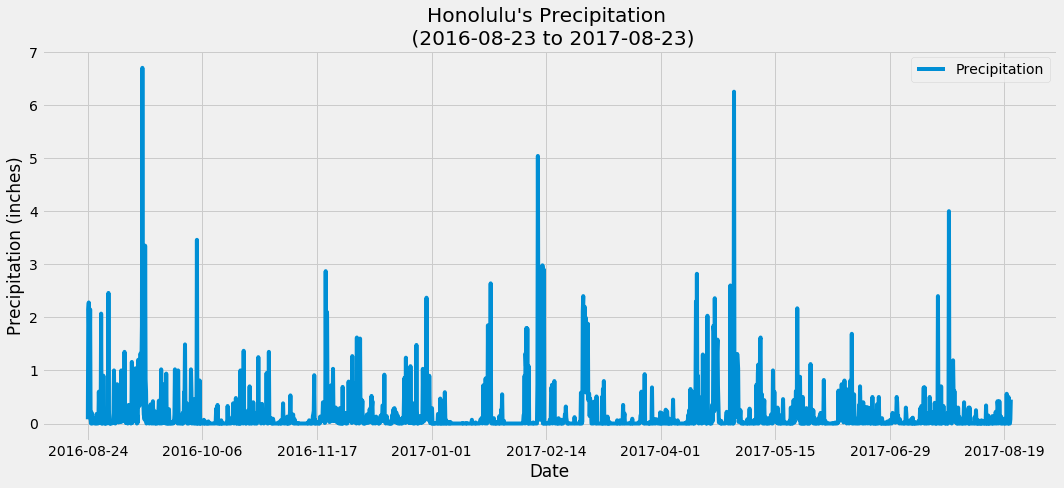

In [339]:
fig, ax = plt.subplots(figsize = (15, 7))
clean_df.plot(ax = ax, x_compat = True)

#set title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')
ax.set_title("Honolulu's Precipitation \n (2016-08-23 to 2017-08-23)")

#save figure
plt.savefig("Images/honolulu_precip.png")

#plot figure
plt.tight_layout()
plt.show()

In [340]:
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

### I then moved onto writing queries, that would help me analize the Stations:

(10) I designed a query that showe me how many stations are available in the dataset:

In [341]:
num_of_stations = session.query(Station.id).distinct().count()
print(f' There are a total of: {num_of_stations} stations available at this time')

 There are a total of: 9 stations available at this time


(11) I then wanted to identify the most active stations (i.e which stations had the most rows) and then list the stations and the counts in descending order.

In [342]:
active_stations = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement)\
.join(Station, Measurement.station ==Station.station).group_by(Station.station).order_by(func.count\
(Measurement.id).desc()).all()

(11.1) I used a for loop to iterate through the results and print both the Station ID and the total observation Count

In [343]:
for station in active_stations:
    print(f'Station ID: {station[0]}\t | Observation count: {station[1]}')

Station ID: USC00519281	 | Observation count: 2772
Station ID: USC00519397	 | Observation count: 2724
Station ID: USC00513117	 | Observation count: 2709
Station ID: USC00519523	 | Observation count: 2669
Station ID: USC00516128	 | Observation count: 2612
Station ID: USC00514830	 | Observation count: 2202
Station ID: USC00511918	 | Observation count: 1979
Station ID: USC00517948	 | Observation count: 1372
Station ID: USC00518838	 | Observation count: 511


(12) I then took the ID from the most active Station (in this case 'USC00519281') and use this as the basis in which to calculate (i) lowest temperature (ii) highest temperature (iii) average temperature: 

In [344]:
active_station = 'USC00519281'
active_summary = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station == active_station).all()
print(f'----------------------------------------\nMost active Station (USC00519281) Stats:\n----------------------\
------------------')
print(f'Lowest Recorded Temperature: {active_summary[0][0]}°F\nHighest Recorded Temperature: \
{active_summary[0][1]}°F\nAverage Recorded Temperature: {round(active_summary[0][2], 2)}°F')

----------------------------------------
Most active Station (USC00519281) Stats:
----------------------------------------
Lowest Recorded Temperature: 54.0°F
Highest Recorded Temperature: 85.0°F
Average Recorded Temperature: 71.66°F


(13) I then designed a query that would retreive the last 12-months of TOBS data for the USC00519281

In [345]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_yr = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station\
== active_station).filter(func.strftime("%Y-%m-%d", Measurement.date)>= datetime.date(2016,8,23)).all()

active_station_yr_df = pd.DataFrame(active_station_yr, columns = ['Date', 'Temperature'])
active_station_yr_df.set_index('Date', inplace = True)
active_station_yr_df

,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


(14) I finally took the data from my active_station_yr_df and used matplotlib to plot a histogram

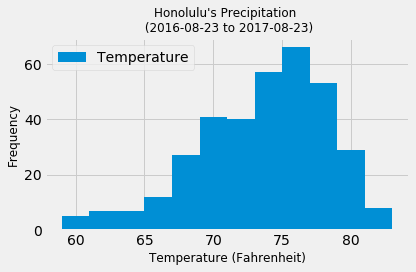

In [347]:

#plot histogram
fig, ax = plt.subplots()
active_station_yr_df.plot.hist(bins = 12, ax = ax)

#set labels
ax.set_title("Honolulu's Precipitation \n (2016-08-23 to 2017-08-23)", size = 12)
ax.set_xlabel('Temperature (Fahrenheit)', size = 12)
ax.set_ylabel('Frequency', size = 12)

#save figure
plt.savefig("Images/active_station_histogram.png")

#plot
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
